In [1]:
import pennylane as qml
from pennylane import numpy as np

import numpy as np_
import matplotlib.pyplot as plt

t, gamma = 0, 0

# select default.mixed for simulating device
dev = qml.device("default.mixed", wires=[0])

In [2]:
# == Define circuit ==

# Post-selected density matrix
def rho_ps(phi):
    density_matrix_ps = np.array([
        [(gamma - 1)*(np.exp(t) + np.cos(phi)), 1.j * np.sqrt(1-gamma)*np.sin(phi)],
        [-1.j * np.sqrt(1-gamma)*np.sin(phi), np.cos(phi) - np.exp(t)]]) / (gamma*np.cos(phi) + (gamma - 2) * np.exp(t))

    return density_matrix_ps


@qml.qnode(dev)
def circuit(phi):
    density_matrix = rho_ps(phi)
    qml.QubitDensityMatrix(density_matrix, wires=0)

    return qml.expval(qml.PauliZ(0))

In [3]:
# @jit(nopython = True)
def CFI_Plot(Sweep_bound, Step_size, T, Gamma_in):
    global gamma
    gamma = Gamma_in
    
    # Searching range 
    Phi_range = np.arange(Sweep_bound[0], Sweep_bound[1], Step_size)
    
    # Define as original numpy
    Num_CFI = len(T)
    CFI = np_.zeros((Num_CFI, len(Phi_range)))
    
    for i in range(Num_CFI):
        for j in range(len(Phi_range)):
            # Set global var
            global t
            t = T[i]
            gamma_dephase = 1 - np.exp(-2 * t) 
            Temp = qml.qinfo.classical_fisher(circuit)(Phi_range[j])
        
            # Casting to np.array
            CFI[i][j] = np.array(Temp[0], requires_grad = 'False')
        
            Temp = np.zeros(1)  
            
    for i in range(Num_CFI):
        plt.plot(Phi_range, CFI[i][:], label = f't = {T[i]}')
    
    plt.title(f'CFI at $\gamma$ = {gamma}')
    plt.xlabel('Time')
    plt.ylabel('CFI')
    plt.legend()
    plt.grid() 

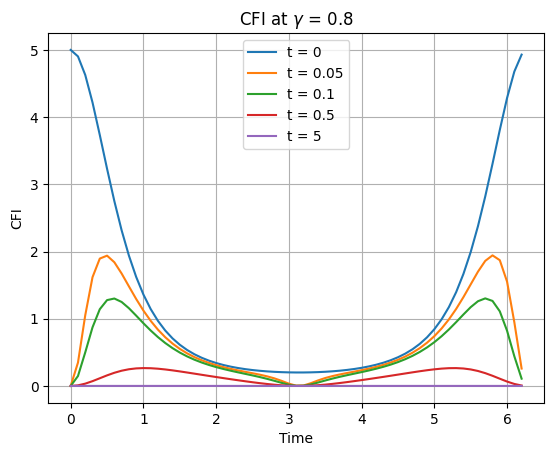

In [4]:
Sweep_range_0 = np_.array([-1e-3, np.pi*2 + 1e-4])
T = 0, 0.05, 0.1, 0.5, 5

CFI_Plot(Sweep_range_0, 0.1, T, 0.8)

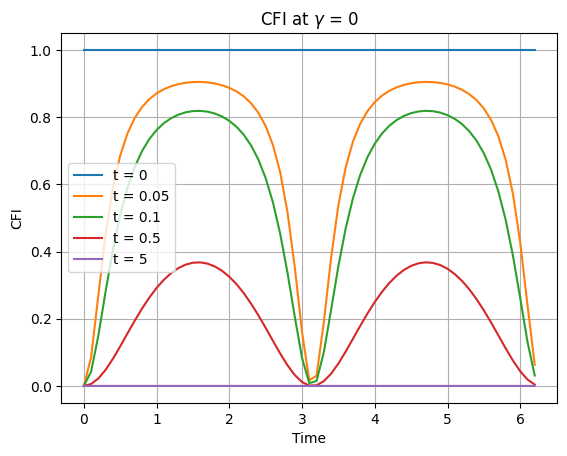

In [5]:
CFI_Plot(Sweep_range_0, 0.1, T, 0)